In [10]:
%matplotlib inline


Second-level fMRI model: one sample test
========================================

Full step-by-step example of fitting a GLM to perform a second-level analysis (one-sample test)
and visualizing the results.

More specifically:

1. A sequence of subject fMRI button press contrasts is downloaded.
2. a mask of the useful brain volume is computed
3. A one-sample t-test is applied to the brain maps

We focus on a given contrast of the localizer dataset: the motor response to left versus right button press. Both at the ndividual and group level, this is expected to elicit activity in the motor cortex (positive in the right hemisphere, negative in the left hemisphere).




Fetch dataset
--------------
We download a list of left vs right button press contrasts from a
localizer dataset. Note that we fetc individual t-maps that represent the Bold activity estimate divided by the uncertainty about this estimate. 



In [2]:
from nilearn.datasets import fetch_localizer_contrasts
n_subjects = 16
data = fetch_localizer_contrasts(["left vs right button press"], n_subjects,
                                 get_tmaps=True)

Downloaded 7721329 of 7721329 bytes (100.0%,    0.0s remaining) ...done. (6 seconds, 0 min)
Extracting data from /home/jbart047/nilearn_data/brainomics_localizer/ecccd3d59c38563200c4bd1e49bc076c/brainomics_data_24.zip..... done.


Downloaded 1555 of 1555 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 64001 of 64001 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)
/home/data/cis/training-week-2019/env/lib/python3.6/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Display subject t_maps
----------------------
We plot a grid with all the subjects t-maps thresholded at t = 2 for
simple visualization purposes. The button press effect is visible among
all subjects



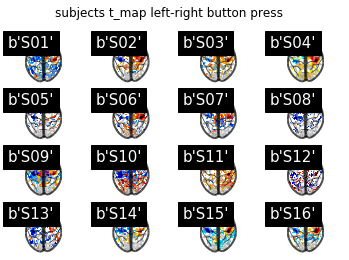

In [15]:
from nilearn import plotting
import matplotlib.pyplot as plt
subjects = [subject_data[0] for subject_data in data['ext_vars']]
fig, axes = plt.subplots(nrows=4, ncols=4)
for cidx, tmap in enumerate(data['tmaps']):
    plotting.plot_glass_brain(tmap, colorbar=False, threshold=2.0,
                              title=subjects[cidx],
                              axes=axes[int(cidx / 4), int(cidx % 4)],
                              plot_abs=False, display_mode='z')
fig.suptitle('subjects t_map left-right button press')
plt.show()

Estimate second level model
---------------------------
We define the input maps and the design matrix for the second level model
and fit it.



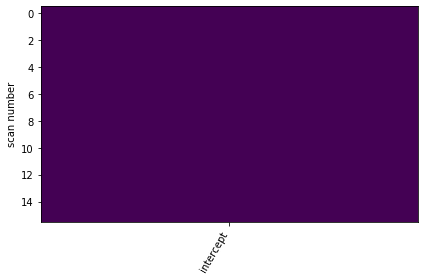

In [16]:
import pandas as pd
second_level_input = data['cmaps']
design_matrix = pd.DataFrame([1] * len(second_level_input),
                             columns=['intercept'])

from nistats.reporting import plot_design_matrix
plot_design_matrix(design_matrix)
import matplotlib.pyplot as plt
plt.show()

Model specification and fit



In [5]:
from nistats.second_level_model import SecondLevelModel
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input,
                                            design_matrix=design_matrix)

/home/data/cis/training-week-2019/env/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


To estimate the contrast is very simple. We can just provide the column
name of the design matrix.



In [6]:
z_map = second_level_model.compute_contrast(output_type='z_score')

We threshold the second level contrast at uncorrected p < 0.001 and plot



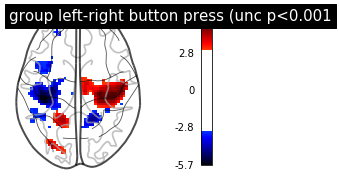

In [12]:
from scipy.stats import norm
p_val = 0.001
p001_unc = norm.isf(p_val)
display = plotting.plot_glass_brain(
    z_map, threshold=p001_unc, colorbar=True, display_mode='z', plot_abs=False,
    title='group left-right button press (unc p<0.001')
plotting.show()

As expected, we find the motor cortex

